### Imports:

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy
import scipy.stats as ss
import seaborn as sns
from statsmodels.sandbox.stats.multicomp import multipletests

%matplotlib inline
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 75

# Analysis

In [2]:
first_actual_row = 59 # all previous rows are some irrelevant metadata

df = pd.read_csv('AMI_GSE66360_series_matrix.csv', encoding='ISO-8859-1', header= None)
a = df.drop(df.index[:first_actual_row]).reset_index(drop=True)
a.dropna(how='any', axis=0)

df = a.T # make patients as rows and [Class, IDs, and genes] as columns, for better readability
column_names = df.iloc[0] # get column names
df = df[1:] # don't include headers row in data
df.columns = column_names

C:\Users\neshe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.2573,13.2662,14.5712,14.2766,4.50466,3.13933,2.74701,2.65155,3.41343,3.14061
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.5939,13.517,14.7388,14.3412,4.40923,3.03996,2.63861,2.64362,3.39906,3.13269
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.3728,13.4166,14.6272,14.3186,4.31008,3.22011,2.49526,2.62603,3.53997,3.6984
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.4902,13.4948,14.7541,14.3633,4.43931,3.26378,2.5442,2.50496,3.39623,3.63861
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.2368,13.3302,14.5484,14.2637,4.56288,3.13852,2.50663,2.60971,3.43472,3.57765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,...,6.60175,5.94231,7.29051,8.98851,5.56795,5.55878,5.42944,4.48794,4.25429,5.37581
96,M,GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,...,14.271,14.1637,14.8845,14.7925,4.9022,3.417,2.83474,2.78236,3.88208,3.74414
97,M,GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,...,13.8986,13.6824,14.8845,14.7838,5.23991,3.69918,3.24968,3.05673,3.64983,4.02154
98,M,GSM1620916,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,...,13.847,13.5516,14.8581,14.7782,4.55613,3.48528,2.71141,2.83382,3.52341,3.81256


### a) High level description of the data and some pre-processing

1. There are 54675 genes profiles - each represented by a column (and as rows originally, before our pre-processing)
2. There are 99 samples (subjects/patients) in total - each represented by a row  (and as columns originally, before our pre-processing)

In [4]:
H, M = df['Class'].value_counts()
print(f'3. There are {H} H samples in the H class, and {M} M samples.')
print(f'\t(H – Healthy, M - Myocardial Infraction)')

3. There are 50 H samples in the H class, and 49 M samples.
	(H – Healthy, M - Myocardial Infraction)


##### 4. If there are missing values, then remove the entire row (gene) from the data matrix

In [5]:
df.dropna(axis='columns', inplace=True) # Removing columns with missing values
df

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.2573,13.2662,14.5712,14.2766,4.50466,3.13933,2.74701,2.65155,3.41343,3.14061
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.5939,13.517,14.7388,14.3412,4.40923,3.03996,2.63861,2.64362,3.39906,3.13269
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.3728,13.4166,14.6272,14.3186,4.31008,3.22011,2.49526,2.62603,3.53997,3.6984
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.4902,13.4948,14.7541,14.3633,4.43931,3.26378,2.5442,2.50496,3.39623,3.63861
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.2368,13.3302,14.5484,14.2637,4.56288,3.13852,2.50663,2.60971,3.43472,3.57765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,...,6.60175,5.94231,7.29051,8.98851,5.56795,5.55878,5.42944,4.48794,4.25429,5.37581
96,M,GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,...,14.271,14.1637,14.8845,14.7925,4.9022,3.417,2.83474,2.78236,3.88208,3.74414
97,M,GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,...,13.8986,13.6824,14.8845,14.7838,5.23991,3.69918,3.24968,3.05673,3.64983,4.02154
98,M,GSM1620916,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,...,13.847,13.5516,14.8581,14.7782,4.55613,3.48528,2.71141,2.83382,3.52341,3.81256


In [6]:
columns = df.shape[1]
print(f'After removing missing-values columns, our dataframe has {columns} columns')

After removing missing-values columns, our dataframe has 54630 columns


##### 5. Pick 20 genes at random. Draw histograms comparing expression levels of each of these genes in the two classes M and H

In [7]:
number_of_random_genes = 20

sample_df = df.sample(n=number_of_random_genes, axis='columns')
sample_df = sample_df.join(df['Class'])
sample_df

,1567458_s_at,221653_x_at,232981_s_at,203878_s_at,202128_at,237759_at,202349_at,1552412_a_at,208126_s_at,225409_at,...,1557569_at,226003_at,243961_at,238678_at,1563128_at,87100_at,208711_s_at,224109_at,52940_at,Class
1,8.36111,12.2805,7.94596,5.37557,9.1118,6.38285,11.4917,2.435059457,3.32831,9.99587,...,5.0734568,8.52742,5.46797,10.7405,2.668693941,5.1269,4.06573,2.50774,11.0321,H
2,7.29709,11.6778,7.23699,5.2161,8.80394,6.35054,11.2723,3.099768982,6.17333,10.1346,...,5.702549112,8.84879,5.83025,10.8511,3.236558354,4.73874,3.96656,3.07767,10.6787,H
3,7.67466,11.522,7.41491,5.72933,9.13294,6.1811,10.8426,4.83332104,3.153,9.8014,...,5.591656674,8.65482,5.6381,10.6887,3.196258169,4.6331,4.52635,2.65668,11.0196,H
4,8.48729,11.8151,7.7009,5.52715,9.46856,6.4801,11.2241,2.803446554,4.57736,9.90444,...,5.417554635,8.95832,6.41464,10.9398,2.887976336,4.3013,4.35024,2.53289,12.0046,H
5,7.70471,11.9421,7.65491,5.57112,8.87335,6.1609,11.4269,3.012295756,3.12435,10.1169,...,5.63553789,8.49707,5.85285,10.5519,2.524788373,4.4877,4.47604,2.58172,11.3397,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.37474,7.58085,7.16884,6.28326,6.09488,6.80511,5.39369,5.623967922,6.52597,5.48339,...,5.978207287,6.89321,5.52238,5.93104,4.532286701,6.97762,5.60037,3.69489,7.6745,M
96,6.94281,11.7281,6.1386,6.2934,7.88149,5.26221,9.32727,3.631160507,3.21967,7.55082,...,6.561096121,9.53091,7.90749,11.3039,2.892787666,4.84634,4.64072,3.05794,8.74625,M
97,8.16521,11.1428,6.41048,6.12703,9.35102,6.1811,10.418,3.090748019,5.87749,9.23228,...,7.023644322,10.2365,5.18026,8.77712,2.854023296,4.87954,4.7418,2.58288,10.2803,M
98,8.35278,11.9557,7.73157,5.33554,9.21391,5.54262,11.1199,3.380046266,3.30669,9.87822,...,5.453383909,10.107,5.66396,10.4509,2.952369749,4.81423,4.05164,2.48054,10.3843,M


In [8]:
mask = sample_df['Class'] == 'H'
sample_df_H = sample_df[mask]
sample_df_M = sample_df[~mask]

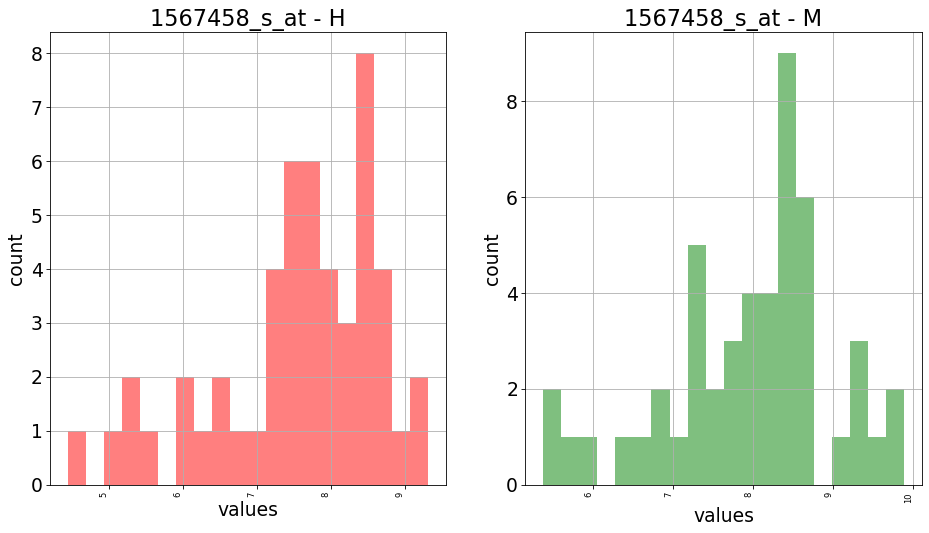

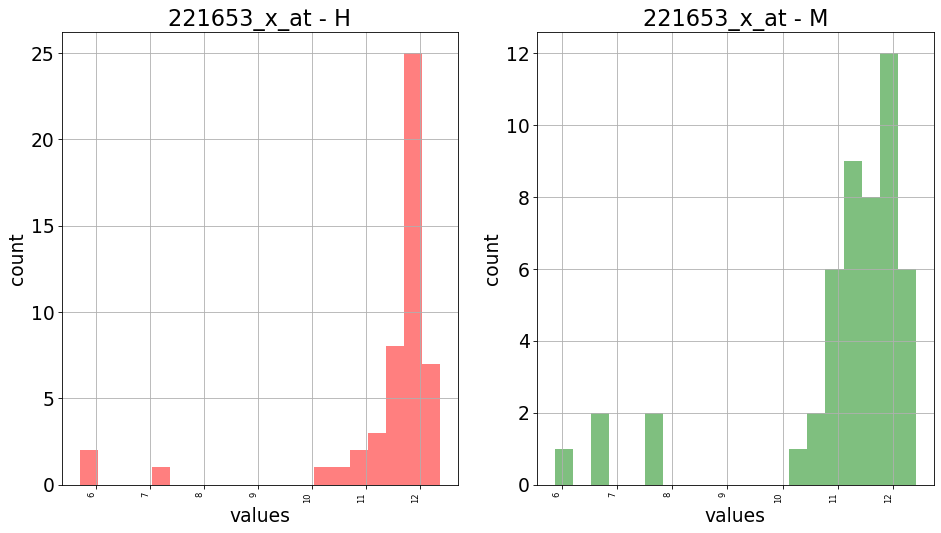

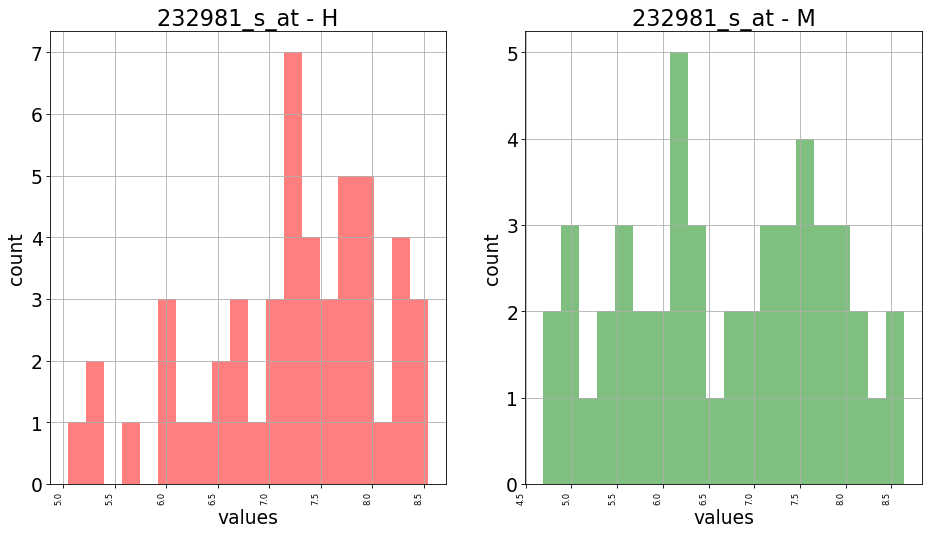

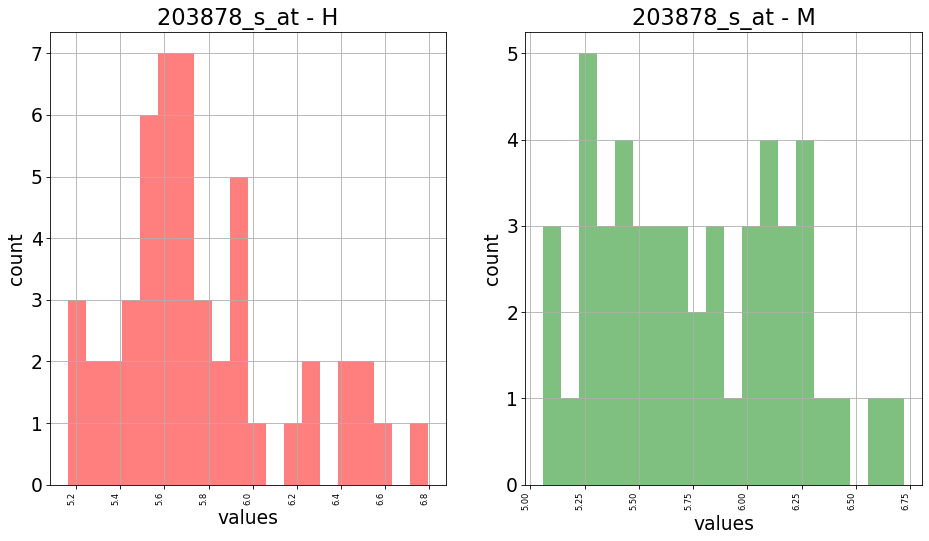

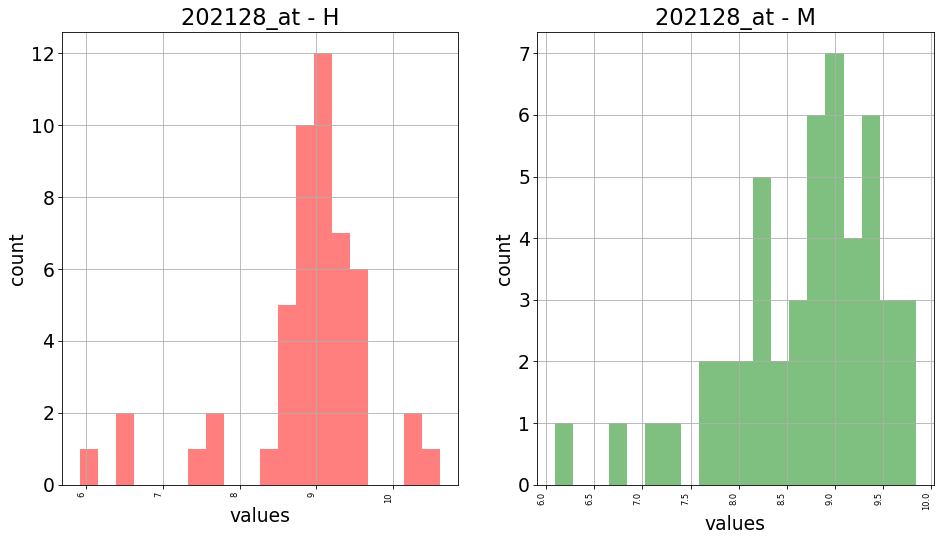

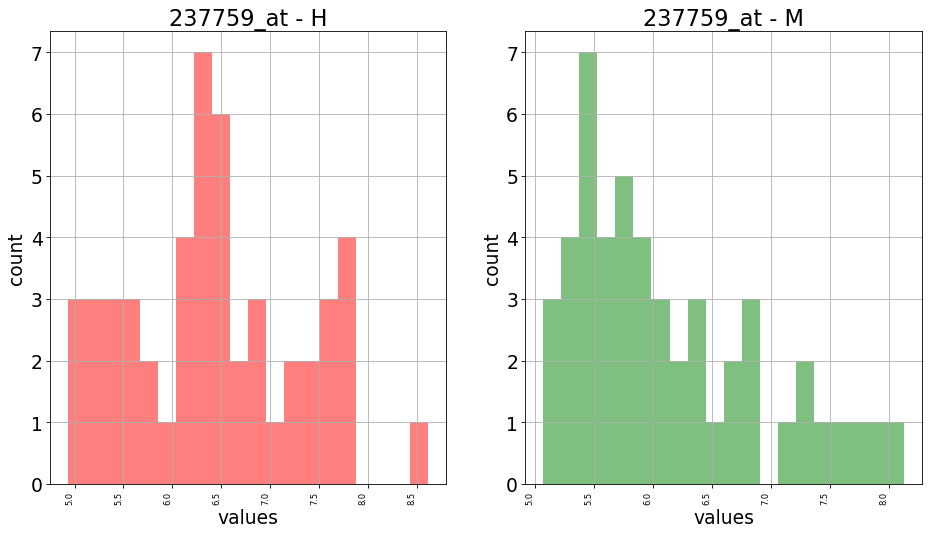

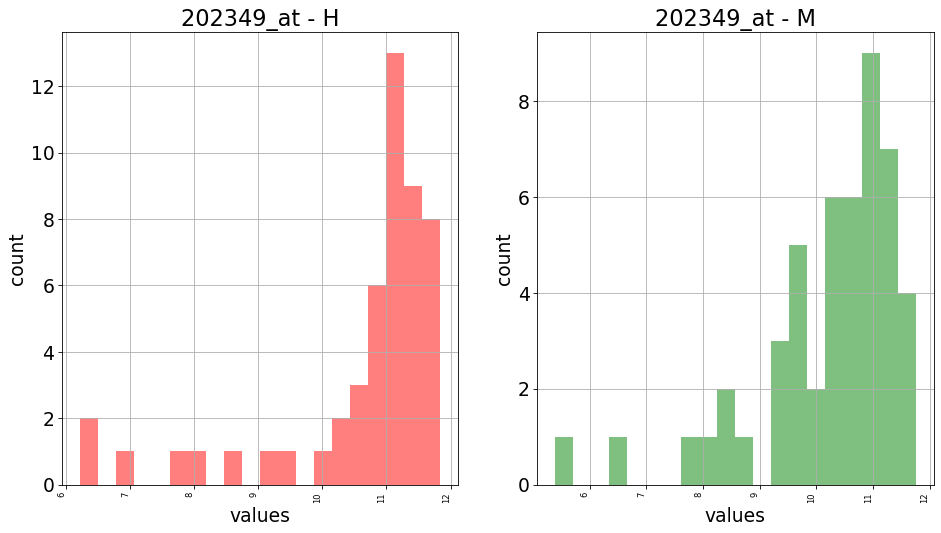

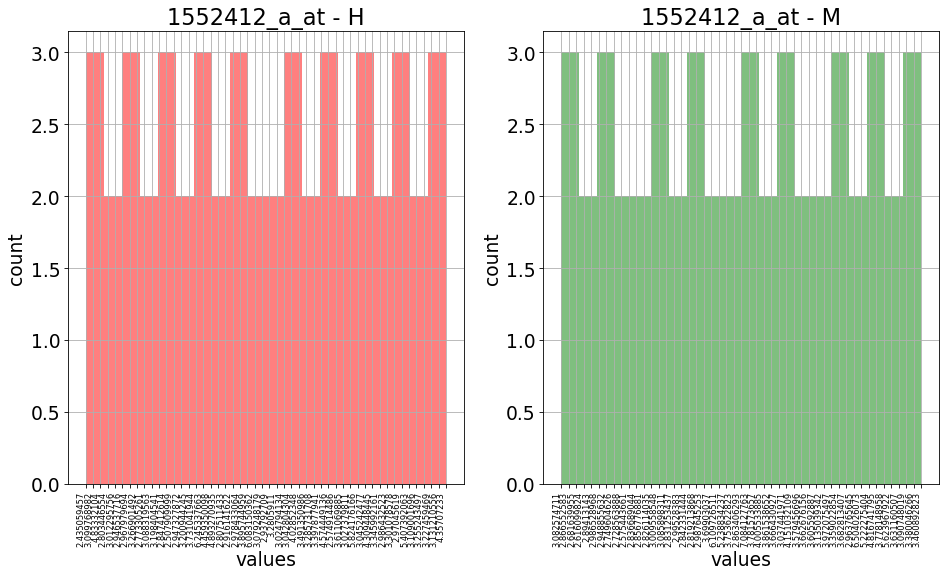

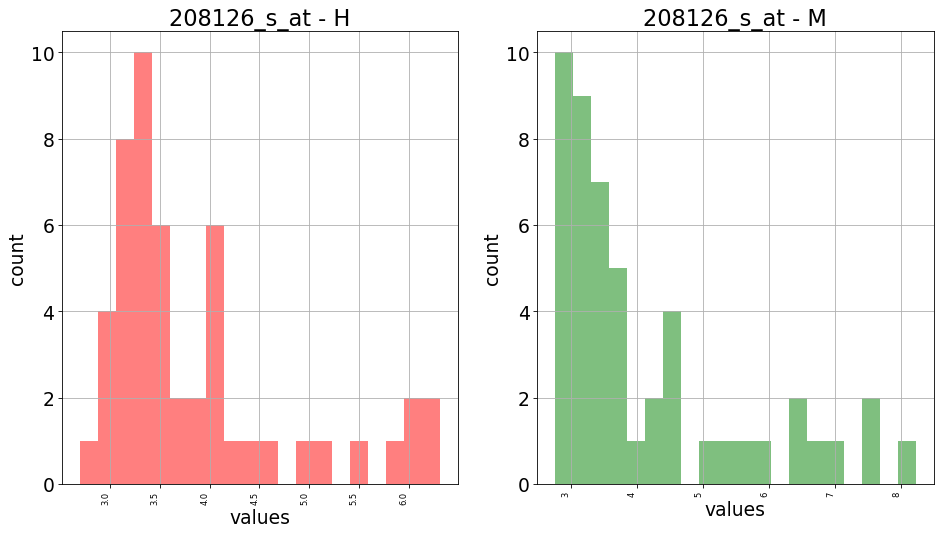

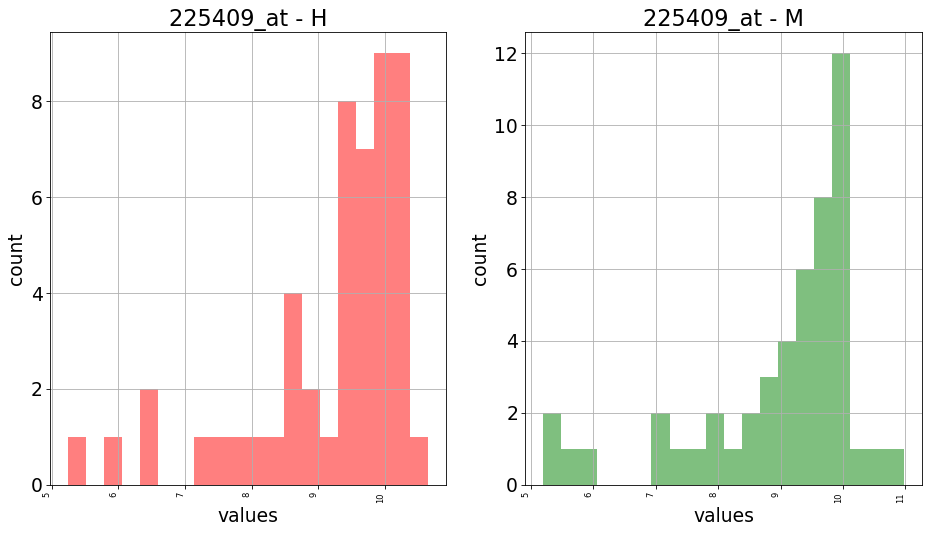

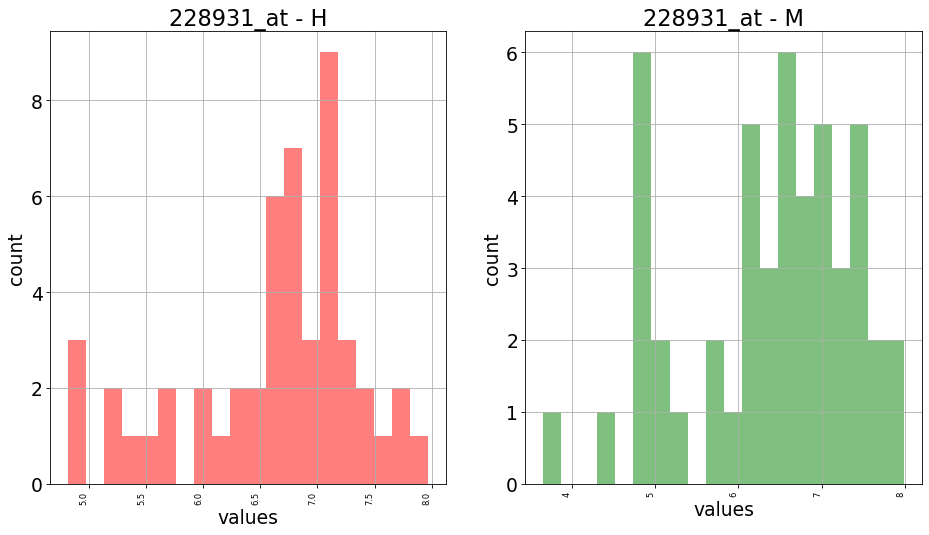

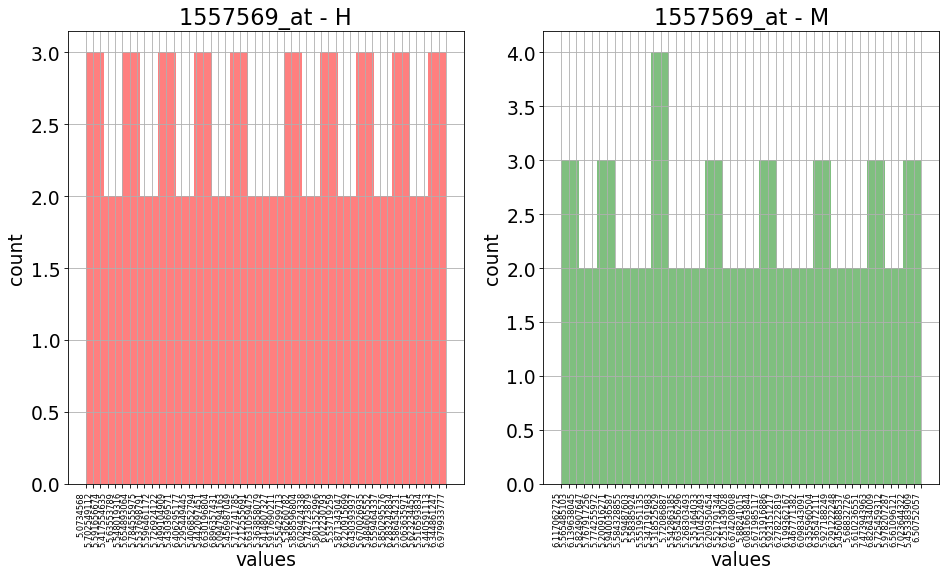

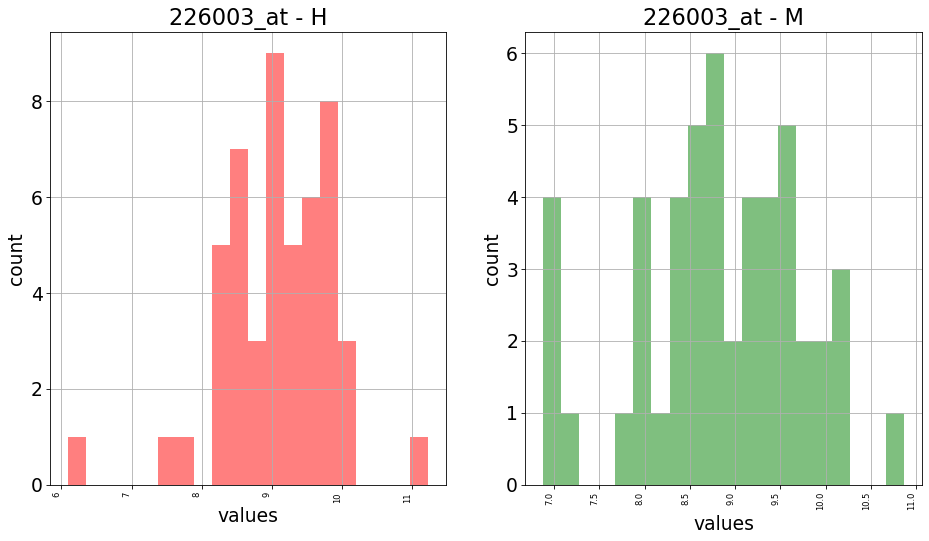

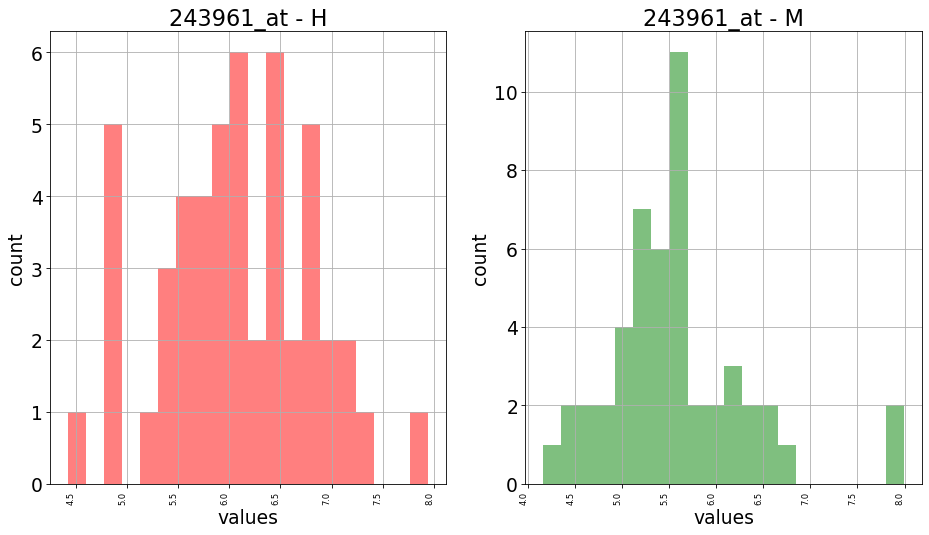

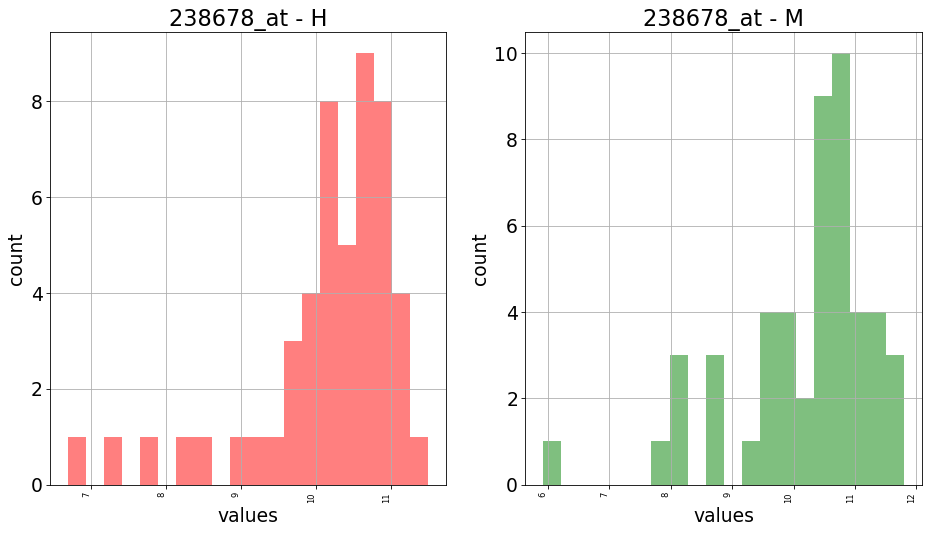

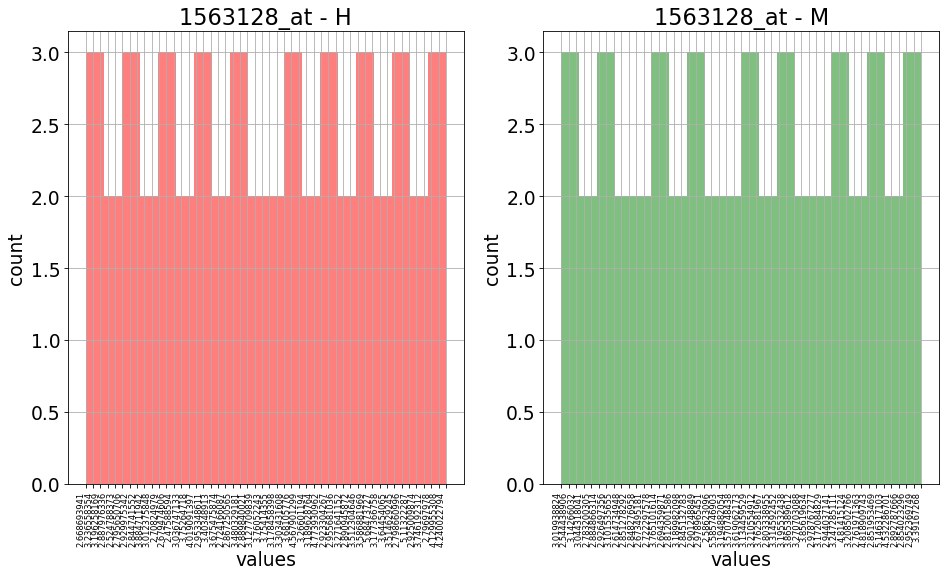

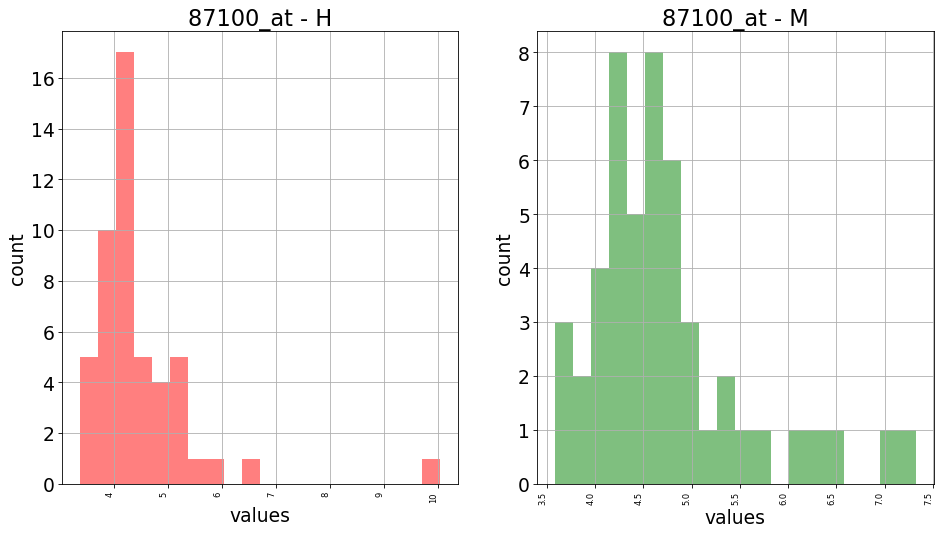

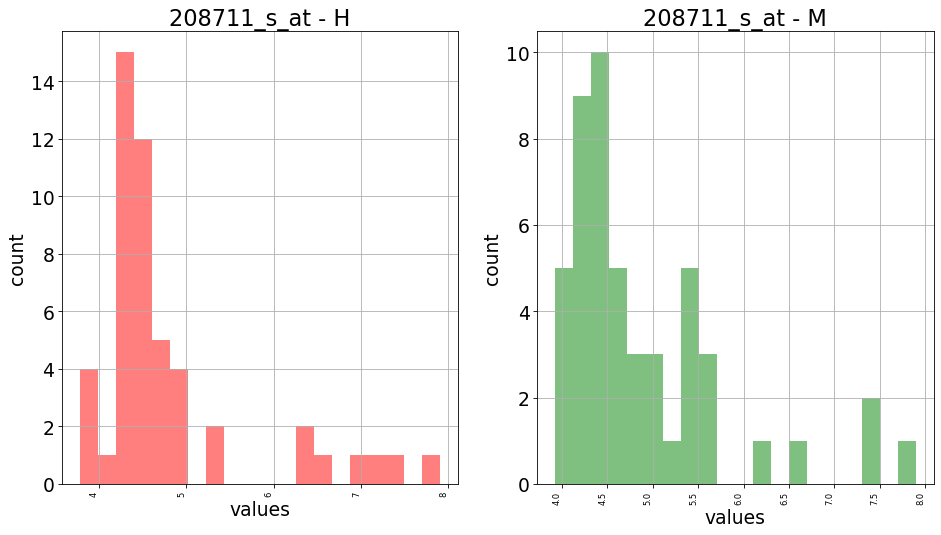

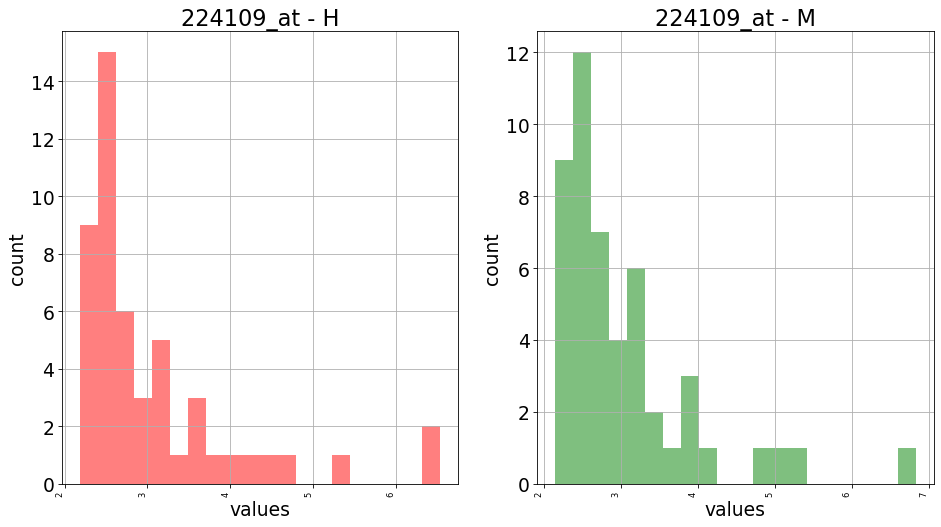

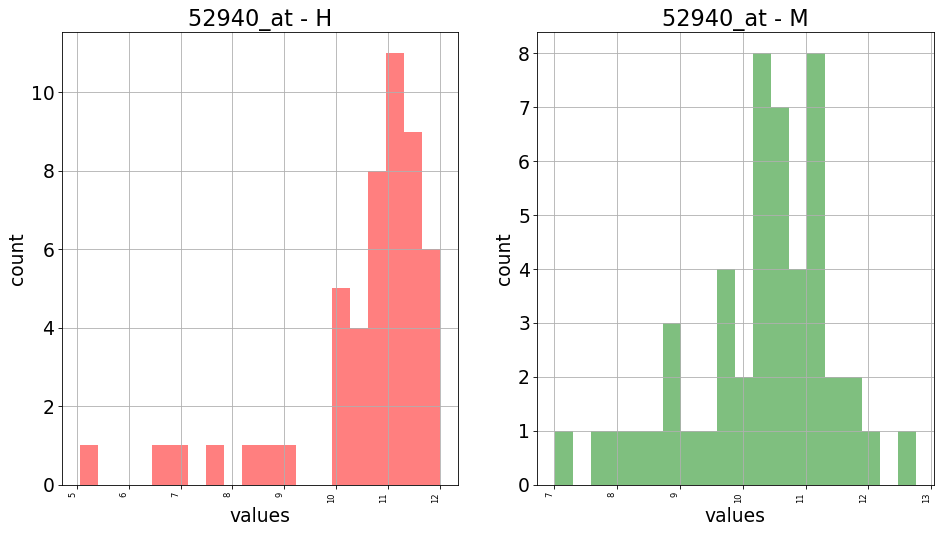

In [12]:
BINS = 20
x_label = 'values'
y_label = 'count'


# iterating the columns 
for col in sample_df.columns:
    if col == 'Class':
        break
    
    fig, ax = plt.subplots(1,2, figsize=(15,8))
    ax[0].hist(sample_df_H[col], BINS, alpha = 0.5, color = 'r')
    ax[1].hist(sample_df_M[col], BINS, alpha = 0.5, color = 'g')
    
    ax[0].grid(zorder=0)
    ax[1].grid(zorder=0)

    ax[0].title.set_text(f'{col} - H')
    ax[1].title.set_text(f'{col} - M')
    
    ax[0].set_xlabel(x_label)
    ax[1].set_xlabel(x_label)
    
    ax[0].set_ylabel(y_label)
    ax[1].set_ylabel(y_label)
    
    ax[0].tick_params(axis='x', which='major', labelsize=8)
    ax[1].tick_params(axis='x', which='major', labelsize=8)
    
#     fig.autofmt_xdate()

    plt.setp(ax[0].get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
    
    plt.show()

***
### b) WRS for differential expression (DE)

***
### c) Differential Expression

***
### d) Correlations

***
### e) Plots and Conclusions of the DE and correlation analysis